<a href="https://colab.research.google.com/github/alitasselli/aprendendo.python/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math 
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving train.csv to train (3).csv


In [ ]:
arquivo = pd.read_csv("train.csv")

In [ ]:
print(arquivo.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
arquivo.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
arquivo2 = arquivo.drop(columns=['Name', 'PassengerId','SibSp', 'Parch', 'Ticket', 'Cabin' ])

In [ ]:
arquivo2['risk'] = pd.cut(arquivo['Age'], [0,12,60,80], labels=['child', 'adult', 'elder'])

In [ ]:
print(arquivo2.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'risk'], dtype='object')


In [ ]:
Survived_Sex = arquivo2.groupby('Sex')['Survived'].mean()
Survived_Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
Survived_Risk = arquivo2.groupby('risk')['Survived'].mean()
Survived_Risk

risk
child    0.579710
adult    0.393258
elder    0.227273
Name: Survived, dtype: float64

In [ ]:
from itertools import cycle, islice

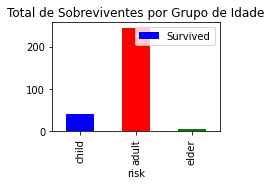

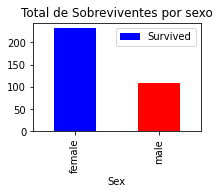

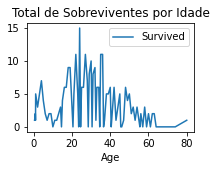

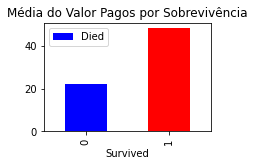

In [ ]:
colors1 = list(islice(cycle(['b', 'r', 'g']), None, len(arquivo)))

risk_arquivo = arquivo2.groupby(['risk']).agg({'Survived': 'sum'})
risk_arquivo.plot.bar(figsize=(3,2),y='Survived', title= "Total de Sobreviventes por Grupo de Idade", color = colors1)

sex_arquivo = arquivo2.groupby(['Sex']).agg({'Survived': 'sum'})
sex_arquivo.plot.bar(figsize=(3,2), y='Survived', title= "Total de Sobreviventes por sexo", color = colors1)

age_arquivo = arquivo2.groupby(['Age']).agg({'Survived': 'sum'})
age_arquivo.plot(figsize=(3,2), y='Survived',title= "Total de Sobreviventes por Idade")

age_arquivo = arquivo2.groupby(['Survived']).agg({'Fare': 'mean'})
age_arquivo.plot.bar(figsize=(3,2), y='Fare',title= "Média do Valor Pagos por Sobrevivência", color=colors1 )
plt.legend(["Died", "Survived"])

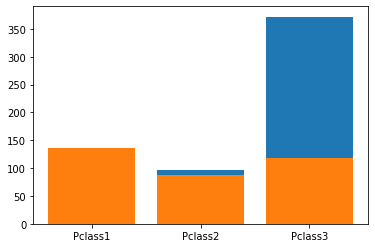

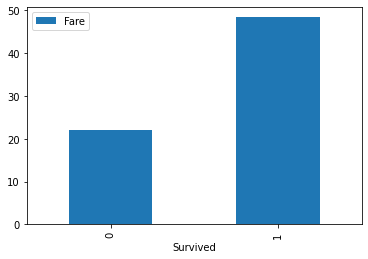

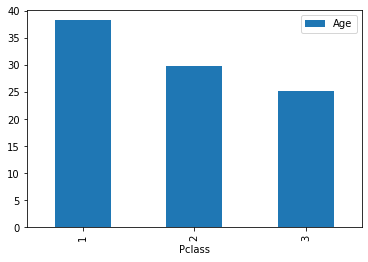

In [ ]:
survivedxclass = arquivo2.groupby(['Survived','Pclass']).groups
dead = [len(survivedxclass[(0,1)]),len(survivedxclass[(0,2)]),len(survivedxclass[(0,3)])]
alive = [len(survivedxclass[(1,1)]),len(survivedxclass[(1,2)]),len(survivedxclass[(1,3)])]
plt.bar(['Pclass1','Pclass2','Pclass3'],dead)
plt.bar(['Pclass1','Pclass2','Pclass3'],alive)
survivedxfare = arquivo2.groupby(['Survived']).agg({'Fare': 'mean'})
survivedxfare.plot.bar(y ='Fare')
classxage = arquivo2.groupby(['Pclass']).agg({'Age': 'mean'})
classxage.plot.bar(y ='Age')

In [ ]:
print(arquivo2.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'risk'], dtype='object')


In [ ]:
arquivo2.isnull().sum(axis = 0)

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
risk        177
dtype: int64

In [ ]:
Pclassmean = arquivo2['Pclass'].mean()
arquivo2['Age'] = arquivo2['Age'].fillna(Pclassmean)

In [ ]:
arquivo3 = arquivo2.dropna()

In [ ]:
arquivo3.isnull().sum(axis = 0)

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
risk        0
dtype: int64

In [ ]:
arquivo4 = pd.get_dummies(arquivo3)
arquivo4

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,risk_child,risk_adult,risk_elder
0,0,3,22.0,7.2500,0,1,0,0,1,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,0,1,0
3,1,1,35.0,53.1000,1,0,0,0,1,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,29.1250,1,0,0,1,0,0,1,0
886,0,2,27.0,13.0000,0,1,0,0,1,0,1,0
887,1,1,19.0,30.0000,1,0,0,0,1,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler 

result = pd.DataFrame(MinMaxScaler().fit_transform(arquivo4), columns=arquivo4.columns)
result

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,risk_child,risk_adult,risk_elder
0,0.0,1.0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,1.0,0.484795,0.056848,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
708,0.0,0.5,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
709,1.0,0.0,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
710,1.0,0.0,0.321438,0.058556,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
